# Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import time

from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
import time

import matplotlib.font_manager as font_manager
from matplotlib import rc
from sklearn.metrics import classification_report

In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (43.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype


In [5]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

# 데이터 불러오기
* 먼저 이상치 수정한 데이터 그대로 해보기
* speed = 0 인 데이터 제거한 후 해보기

In [6]:
df = pd.read_csv('/content/drive/MyDrive/KAMP/test.csv')

In [7]:
df

STD_DT     NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0        2020-03-04 0:00       0        489         116          631  3.19  OK
1        2020-03-04 0:00       1        433          78          609  3.19  OK
2        2020-03-04 0:00       2        464         154          608  3.19  OK
3        2020-03-04 0:00       3        379         212          606  3.19  OK
4        2020-03-04 0:00       4        798        1736          604  3.21  OK
...                  ...     ...        ...         ...          ...   ...  ..
835195  2020-04-30 23:59  835195        755        1743          318  3.21  OK
835196  2020-04-30 23:59  835196        385         206          317  3.19  OK
835197  2020-04-30 23:59  835197        465         148          316  3.20  OK
835198  2020-04-30 23:59  835198        467           0          314  3.19  OK
835199  2020-04-30 23:59  835199        453         125          312  3.20  OK

[835200 rows x 7 columns]

In [15]:
df.drop(labels=["STD_DT", "NUM"], axis=1)

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0             489         116          631  3.19  OK
1             433          78          609  3.19  OK
2             464         154          608  3.19  OK
3             379         212          606  3.19  OK
4             798        1736          604  3.21  OK
...           ...         ...          ...   ...  ..
835195        755        1743          318  3.21  OK
835196        385         206          317  3.19  OK
835197        465         148          316  3.20  OK
835198        467           0          314  3.19  OK
835199        453         125          312  3.20  OK

[835200 rows x 5 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835200 entries, 0 to 835199
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STD_DT       835200 non-null  object 
 1   NUM          835200 non-null  int64  
 2   MELT_TEMP    835200 non-null  int64  
 3   MOTORSPEED   835200 non-null  int64  
 4   MELT_WEIGHT  835200 non-null  int64  
 5   INSP         835200 non-null  float64
 6   TAG          835200 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 44.6+ MB


In [9]:
df.describe()

NUM      MELT_TEMP     MOTORSPEED    MELT_WEIGHT  \
count  835200.000000  835200.000000  835200.000000  835200.000000   
mean   417599.500000     509.200623     459.782865     582.962125   
std    241101.616751     128.277519     639.436413    1217.604433   
min         0.000000     308.000000       0.000000       0.000000   
25%    208799.750000     430.000000     119.000000     186.000000   
50%    417599.500000     469.000000     168.000000     383.000000   
75%    626399.250000     502.000000     218.000000     583.000000   
max    835199.000000     832.000000    1804.000000   55252.000000   

                INSP  
count  835200.000000  
mean        3.194853  
std         0.011822  
min         3.170000  
25%         3.190000  
50%         3.190000  
75%         3.200000  
max         3.230000

In [9]:
col = ["MELT_TEMP", "MOTORSPEED", "MELT_WEIGHT", "INSP"]

In [11]:
for i in col:
    print(np.median(df[i]))

469.0
168.0
383.0
3.19


#EDA

In [10]:
df[df["TAG"]=='NG']

STD_DT     NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
188733   2020-03-17 2:33  188733        338         202          205  3.18  NG
188823   2020-03-17 2:42  188823        364         201           66  3.18  NG
188826   2020-03-17 2:42  188826        362         203           61  3.19  NG
188896   2020-03-17 2:49  188896        370         206          112  3.18  NG
188903   2020-03-17 2:50  188903        365         238          151  3.19  NG
...                  ...     ...        ...         ...          ...   ...  ..
598507  2020-04-14 13:30  598507        454         178          344  3.19  NG
598551  2020-04-14 13:35  598551        458          73          269  3.19  NG
598567  2020-04-14 13:36  598567        452         156          236  3.19  NG
598597  2020-04-14 13:39  598597        455         160          177  3.19  NG
598598  2020-04-14 13:39  598598        457          82          176  3.19  NG

[177067 rows x 7 columns]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'The Number of TAG')

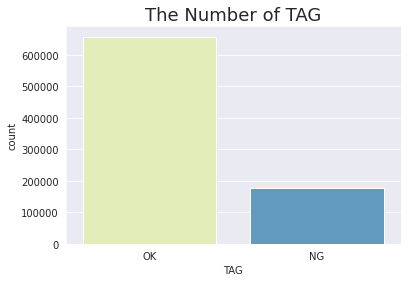

In [ ]:
sns.countplot(df["TAG"], palette=[c2[0], blue[3]])
plt.title("The Number of TAG", fontsize=18)

In [16]:
df1 = df.drop(labels = ['NUM'], axis=1)
df1.head()

STD_DT  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0  2020-03-04 0:00        489         116          631  3.19  OK
1  2020-03-04 0:00        433          78          609  3.19  OK
2  2020-03-04 0:00        464         154          608  3.19  OK
3  2020-03-04 0:00        379         212          606  3.19  OK
4  2020-03-04 0:00        798        1736          604  3.21  OK

In [17]:
df1["STD_DT"] = pd.to_datetime(df["STD_DT"])
df1 = df1.set_index("STD_DT")

df1.head()

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
STD_DT                                                  
2020-03-04        489         116          631  3.19  OK
2020-03-04        433          78          609  3.19  OK
2020-03-04        464         154          608  3.19  OK
2020-03-04        379         212          606  3.19  OK
2020-03-04        798        1736          604  3.21  OK

In [13]:
df1["hour"] = df1.index.hour
df1["day_of_month"] = df1.index.day
df1["day_of_week"] = df1.index.dayofweek
df1["month"] = df1.index.month
df1.head()

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG  hour  day_of_month  \
STD_DT                                                                         
2020-03-04        489         116          631  3.19  OK     0             4   
2020-03-04        433          78          609  3.19  OK     0             4   
2020-03-04        464         154          608  3.19  OK     0             4   
2020-03-04        379         212          606  3.19  OK     0             4   
2020-03-04        798        1736          604  3.21  OK     0             4   

            day_of_week  month  
STD_DT                          
2020-03-04            2      3  
2020-03-04            2      3  
2020-03-04            2      3  
2020-03-04            2      3  
2020-03-04            2      3

## 1. MELT_TEMP

### histogram
* 양 극단에 몰려있음

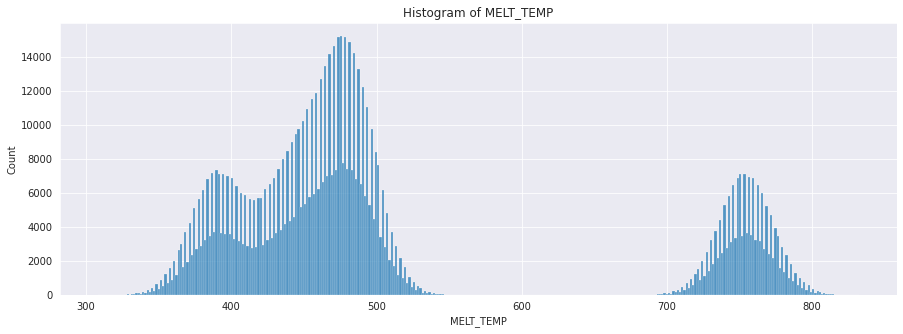

In [20]:
sns.set_style("darkgrid")

fig = plt.figure(figsize=(15,5))

sns.histplot(df1['MELT_TEMP'])
plt.title("Histogram of MELT_TEMP")
plt.show()

### ~ Month(Tag)


In [15]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df1, hue=df1.TAG, y=df1.MELT_TEMP, x=df1.month)
ax.set_title("MELT_TEMP and TAG", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('MELT_TEMP', fontsize=20)
plt.show()

### ~ Hour

In [16]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='MELT_TEMP',hue='TAG',data=df1)
ax.set_title("MELT_TEMP per hour in a day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('MELT_TEMP', fontsize=20)
plt.show()

### ~ Day

* 특징이 될 만한 부분이 보이지 않음

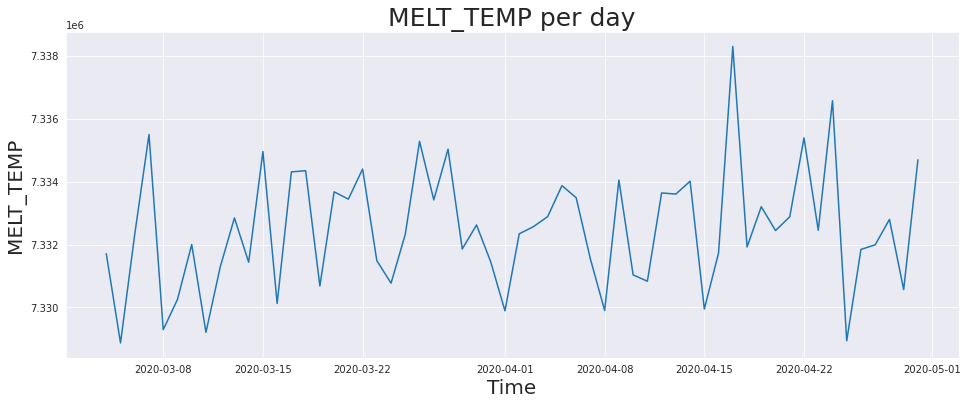

In [17]:
df_by_week = df1.resample("D").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y=df_by_week.MELT_TEMP)
ax.set_title("MELT_TEMP per day", fontsize=25)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel('MELT_TEMP', fontsize=20)
plt.show()

###  ~ day of week

* melt_temp는 일정하게 유지되는 편이라고 볼 수 있음

In [18]:
plt.figure(figsize=(16, 6))

ax = sns.pointplot(x='day_of_week', y='MELT_TEMP',data=df1)
ax.set_title("MELT_TEMP in a week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('MELT_TEMP', fontsize=20)
plt.show()

## 2. MOTOR SPEED

### histogram
* TEMP와 마찬가지로 양 극단에 몰려있음
* 0인 데이터가 굉장히 많음

In [ ]:
sns.set_style("darkgrid")

fig = plt.figure(figsize=(15,6))

# p1 = fig.add_subplot(1,2,1)
# p2 = fig.add_subplot(1,2,2)

sns.histplot(df1['MOTORSPEED'])
plt.title("Histogram of MOTORSPEED", fontsize=18)
plt.show()

### ~ Day

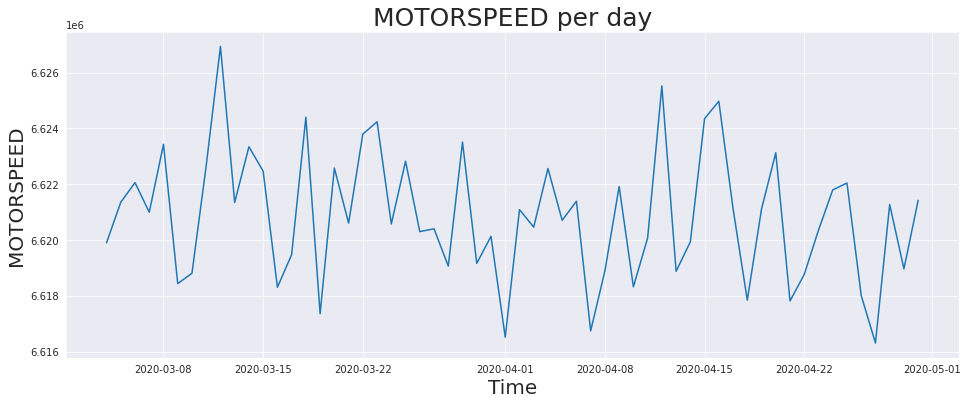

In [20]:
df_by_week = df1.resample("D").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y=df_by_week.MOTORSPEED)
ax.set_title("MOTORSPEED per day", fontsize=25)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel('MOTORSPEED', fontsize=20)
plt.show()

### ~ Month

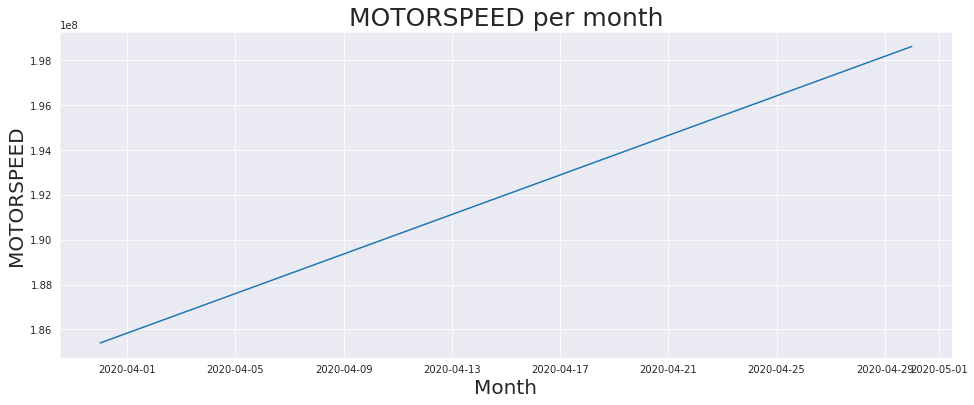

In [21]:
# Resample timeseries, for plotting timeseries month frequency
df_by_month = df1.resample("M").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.MOTORSPEED)
ax.set_title("MOTORSPEED per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('MOTORSPEED', fontsize=20)
plt.show()

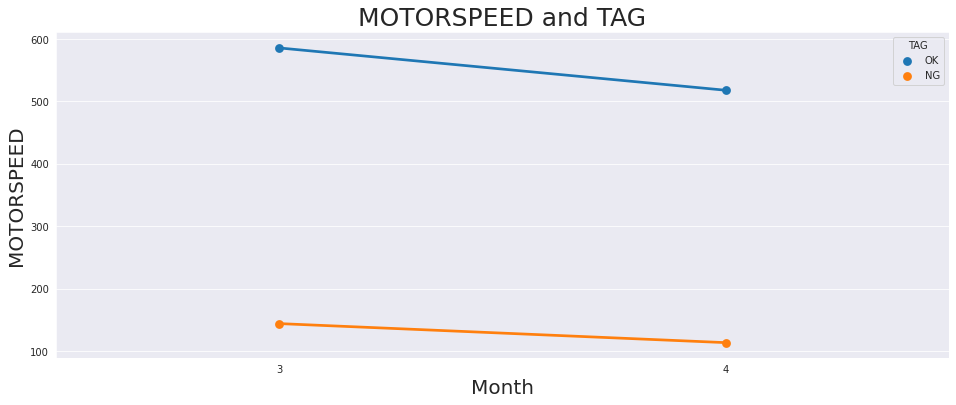

In [22]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df1, hue=df1.TAG, y=df1.MOTORSPEED, x=df1.month)
ax.set_title("MOTORSPEED and TAG", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('MOTORSPEED', fontsize=20)
plt.show()

### ~ Hour(Tag)

In [23]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='MOTORSPEED',hue='TAG',data=df1)
ax.set_title("MOTORSPEED per hour in a day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('MOTORSPEED', fontsize=20)
plt.show()

### ~ day of week

In [24]:
plt.figure(figsize=(16, 6))

ax = sns.pointplot(x='day_of_week', y='MOTORSPEED',data=df1)
ax.set_title("MOTORSPEED in a week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('MOTORSPEED', fontsize=20)
plt.show()

## 3. MELT_WEIGHT

### histogram
* 최대값이 50000을 넘음
* 대부분 10000 이하에 몰려있고, 그 이상의 값은 개수가 적어서 그래프 상에서 잘 안보임

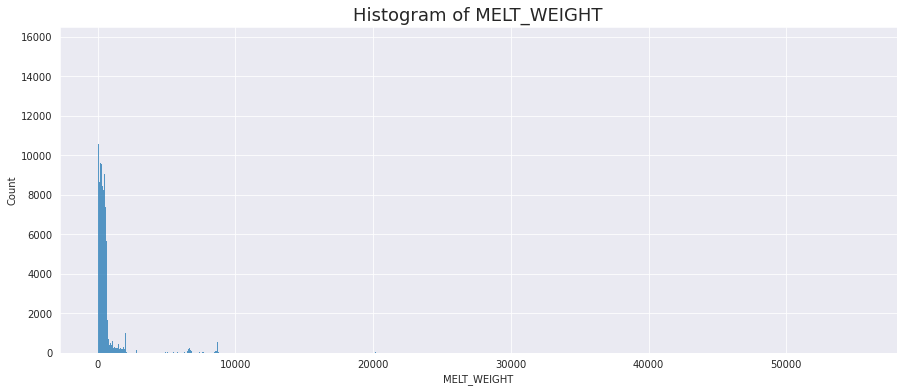

In [ ]:
sns.set_style("darkgrid")

fig = plt.figure(figsize=(15,6))

# p1 = fig.add_subplot(1,2,1)
# p2 = fig.add_subplot(1,2,2)

sns.histplot(df1['MELT_WEIGHT'])
plt.title("Histogram of MELT_WEIGHT", fontsize=18)
plt.show()

### boxplot
* 10000 이상의 데이터를 이상치로 생각하고 분석해보기

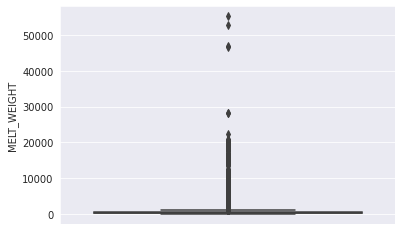

In [26]:
sns.boxplot(y = df1['MELT_WEIGHT'])

### ~ Day

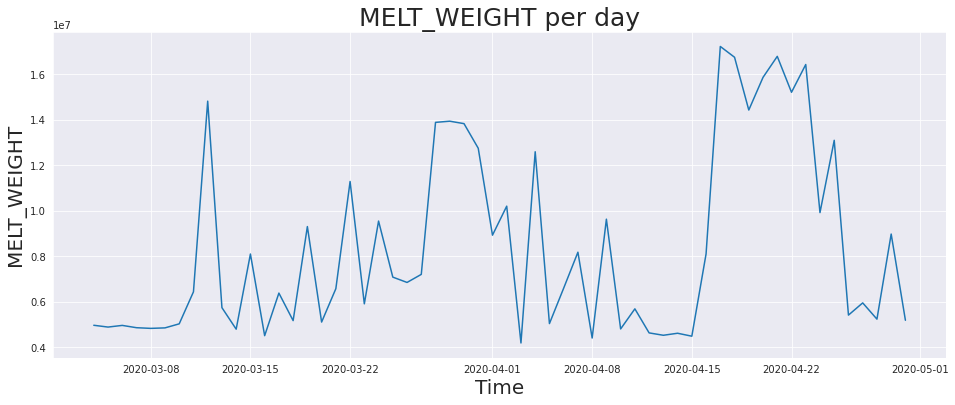

In [27]:
df_by_week = df1.resample("D").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y=df_by_week.MELT_WEIGHT)
ax.set_title("MELT_WEIGHT per day", fontsize=25)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel('MELT_WEIGHT', fontsize=20)
plt.show()

### ~ Month

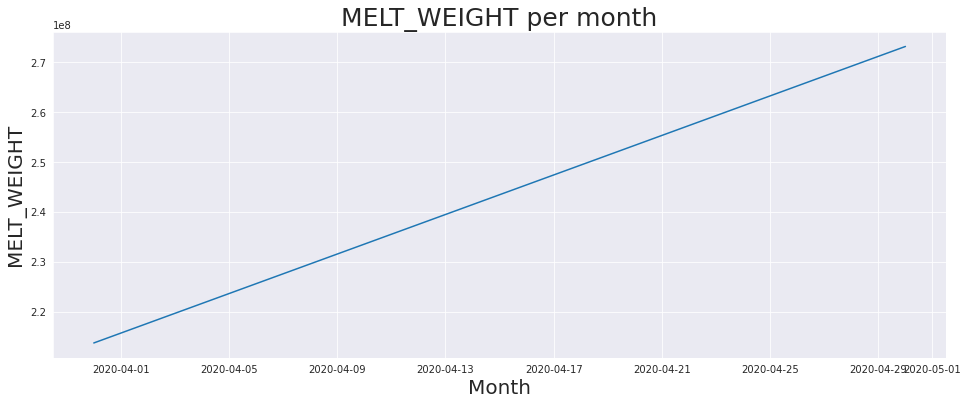

In [28]:
# Resample timeseries, for plotting timeseries month frequency
df_by_month = df1.resample("M").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.MELT_WEIGHT)
ax.set_title("MELT_WEIGHT per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('MELT_WEIGHT', fontsize=20)
plt.show()

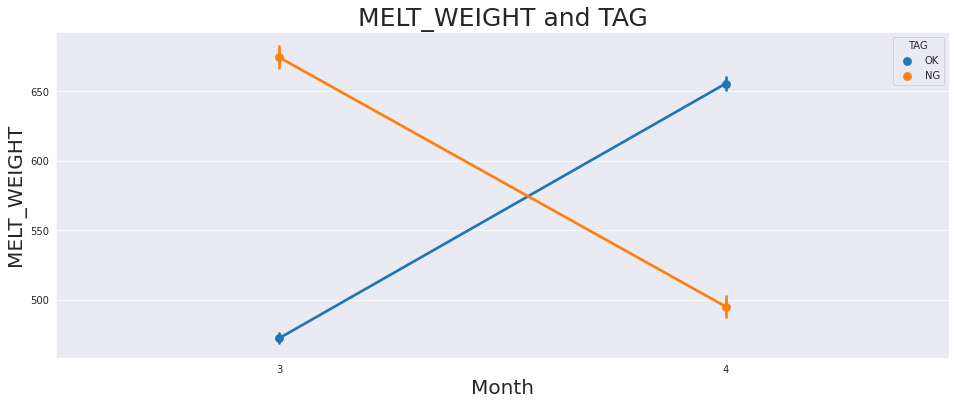

In [29]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df1, hue=df1.TAG, y=df1.MELT_WEIGHT, x=df1.month)
ax.set_title("MELT_WEIGHT and TAG", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('MELT_WEIGHT', fontsize=20)
plt.show()

### ~ Hour(Tag)

In [30]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='MELT_WEIGHT',hue='TAG',data=df1)
ax.set_title("MELT_WEIGHT per hour in a day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('MELT_WEIGHT', fontsize=20)
plt.show()

### ~ day of week

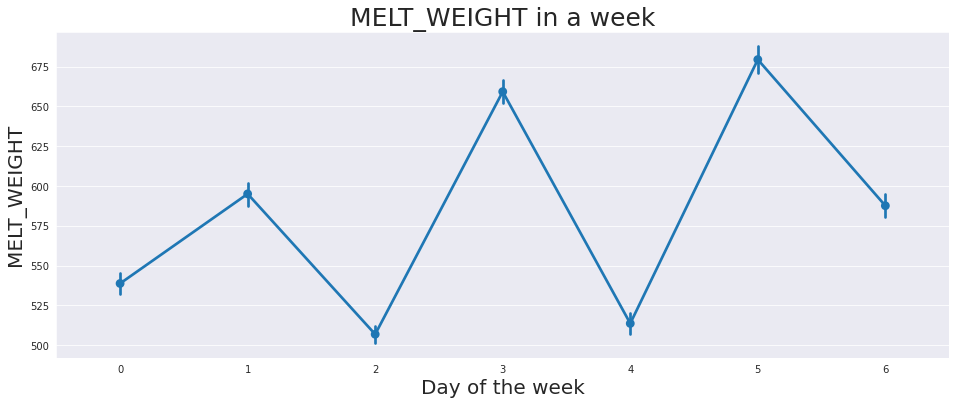

In [31]:
plt.figure(figsize=(16, 6))

ax = sns.pointplot(x='day_of_week', y='MELT_WEIGHT',data=df1)
ax.set_title("MELT_WEIGHT in a week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('MELT_WEIGHT', fontsize=20)
plt.show()

## 4. INSP

### histogram
* 값 자체는 수치이지만 분포를 살펴보면
* 특정 값만 존재하는 컬럼

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


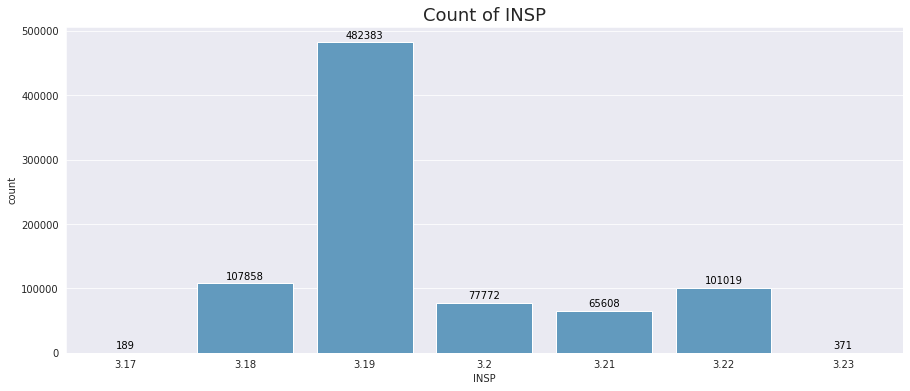

In [ ]:
fig = plt.figure(figsize=(15,6))
g = sns.countplot(df1["INSP"], color=blue[3])
plt.title("Count of INSP", fontsize=18)
ax = g


for p in ax.patches: 
    ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 30), 
       ha='center', va='center', fontsize=10, color='black', xytext=(0, 7), 
       textcoords='offset points') 

### ~ Day

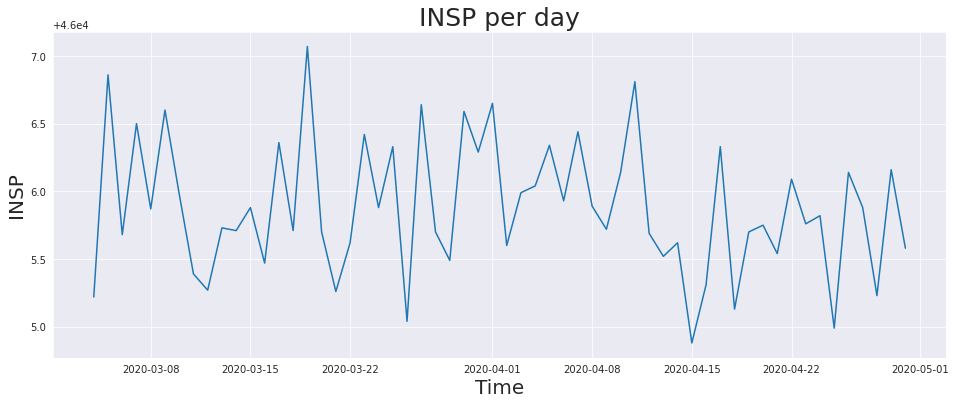

In [33]:
df_by_week = df1.resample("D").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y=df_by_week.INSP)
ax.set_title("INSP per day", fontsize=25)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel('INSP', fontsize=20)
plt.show()

### ~ Month

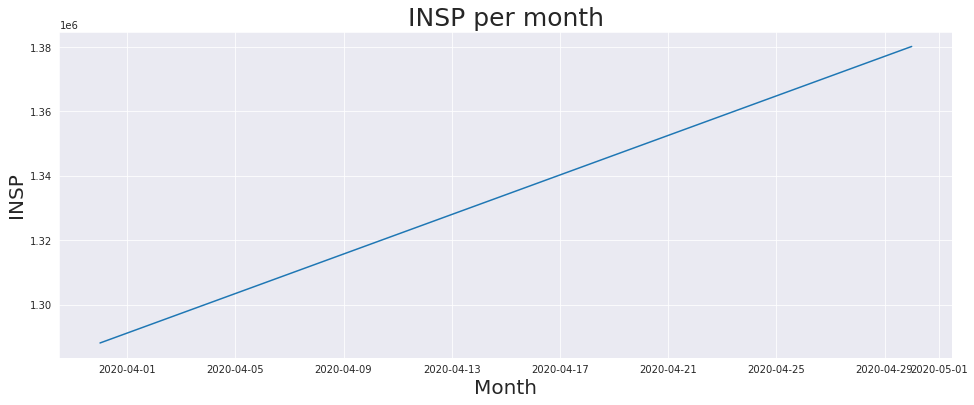

In [34]:
# Resample timeseries, for plotting timeseries month frequency
df_by_month = df1.resample("M").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.INSP)
ax.set_title("INSP per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('INSP', fontsize=20)
plt.show()

In [35]:
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df1, hue=df1.TAG, y=df1.INSP, x=df1.month)
ax.set_title("INSP and TAG", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('INSP', fontsize=20)
plt.show()

### ~ Hour(Tag)

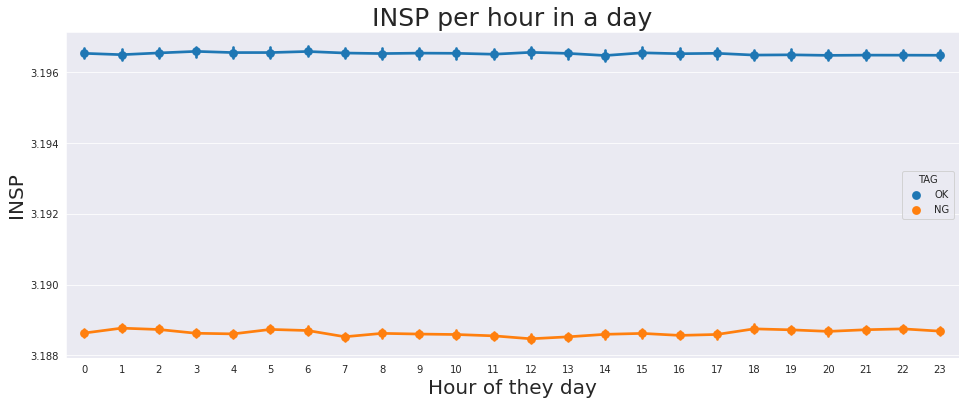

In [36]:
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='INSP',hue='TAG',data=df1)
ax.set_title("INSP per hour in a day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('INSP', fontsize=20)
plt.show()

### ~ day of week

In [37]:
plt.figure(figsize=(16, 6))

ax = sns.pointplot(x='day_of_week', y='INSP',data=df1)
ax.set_title("INSP in a week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('INSP', fontsize=20)
plt.show()

## BoxPlot

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(1,3,1)
sns.boxplot(y=df["MELT_TEMP"], color=blue[3])
plt.title("Boxplot of MELT_TEMP", fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(y=df["MOTORSPEED"], color=blue[3])
plt.title("Boxplot of MOTOR SPEED", fontsize=18)

plt.subplot(1,3,3)
sns.boxplot(y=df["MELT_WEIGHT"], color=blue[3])
plt.title("Boxplot of MELT_WEIGHT", fontsize=18)

Text(0.5, 1.0, 'Boxplot of MELT_WEIGHT')

In [ ]:
plt.figure(figsize=(20,10))

plt.subplot(1,3,1)
sns.boxplot(y=df["MELT_TEMP"], x=df["TAG"], palette=[c2[0], blue[3]])
plt.title("Boxplot of MELT_TEMP", fontsize=18)

plt.subplot(1,3,2)
sns.boxplot(y=df["MOTORSPEED"], x=df["TAG"], palette=[c2[0], blue[3]])
plt.title("Boxplot of MOTOR SPEED", fontsize=18)

plt.subplot(1,3,3)
sns.boxplot(y=df["MELT_WEIGHT"], x=df["TAG"], palette=[c2[0], blue[3]])
plt.title("Boxplot of MELT_WEIGHT", fontsize=18)

Text(0.5, 1.0, 'Boxplot of MELT_WEIGHT')

## Pairplot
* 데이터 자체가 양품인 비율이 굉장히 높은 불균형 데이터
* 변수 간 scatter plot을 찍어보면 주로 모든 변수가 값이 높을 때 양품인 것을 볼 수 있음
 --> 주로 feature값이 높으면 양품이라고 볼 수 있지 않을까?

In [39]:
df

STD_DT     NUM  MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0        2020-03-04 0:00       0        489         116          631  3.19  OK
1        2020-03-04 0:00       1        433          78          609  3.19  OK
2        2020-03-04 0:00       2        464         154          608  3.19  OK
3        2020-03-04 0:00       3        379         212          606  3.19  OK
4        2020-03-04 0:00       4        798        1736          604  3.21  OK
...                  ...     ...        ...         ...          ...   ...  ..
835195  2020-04-30 23:59  835195        755        1743          318  3.21  OK
835196  2020-04-30 23:59  835196        385         206          317  3.19  OK
835197  2020-04-30 23:59  835197        465         148          316  3.20  OK
835198  2020-04-30 23:59  835198        467           0          314  3.19  OK
835199  2020-04-30 23:59  835199        453         125          312  3.20  OK

[835200 rows x 7 columns]

In [43]:
df2 = df.drop(labels=["STD_DT", "NUM"], axis=1)
df2

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP TAG
0             489         116          631  3.19  OK
1             433          78          609  3.19  OK
2             464         154          608  3.19  OK
3             379         212          606  3.19  OK
4             798        1736          604  3.21  OK
...           ...         ...          ...   ...  ..
835195        755        1743          318  3.21  OK
835196        385         206          317  3.19  OK
835197        465         148          316  3.20  OK
835198        467           0          314  3.19  OK
835199        453         125          312  3.20  OK

[835200 rows x 5 columns]

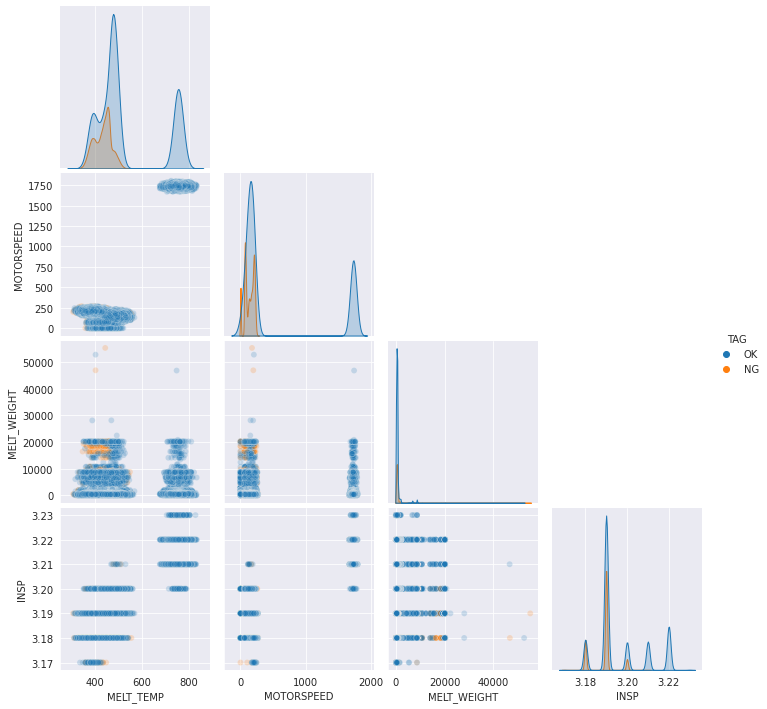

In [44]:
sns.pairplot(data=df2, hue='TAG', corner=True, plot_kws={'alpha':0.2})

## Heatmap
* 변수 간 상관관계 파악
* TEMP와 SPEED는 굉장히 밀접한 관계가 있음(0.94)
* WEIGHT는 다른 변수와 관계가 없는 것으로 보임


Text(0.5, 1.0, 'Correlation of columns')

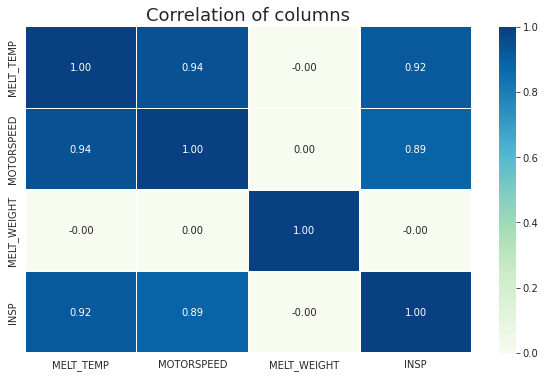

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data = df2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='GnBu')
plt.title("Correlation of columns", fontsize=18)

# MELT_WEIGHT 주기확인

In [ ]:
plt.figure(figsize=(60, 20))
df1["MELT_WEIGHT"][0:3000].plot(linewidth=4)
plt.xticks(fontsize=35)
plt.xlabel("")
plt.yticks(fontsize=35)
plt.ylim([0, 5000])
plt.show()

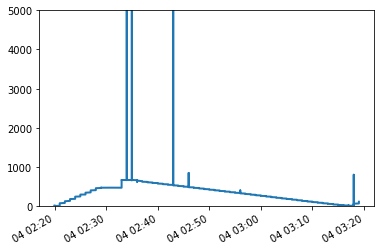

In [ ]:
# plt.figure(figsize=(16, 10))
df1["MELT_WEIGHT"][1400:2000].plot(linewidth=2)
# plt.xticks(fontsize=24)
plt.xlabel("")
# plt.yticks(fontsize=24)
plt.ylim([0, 5000])
plt.show()

# 머신러닝
* 성능지표 : accuracy, f1-score
* 실제 불량을 양품이라고 분류하는 비율이 적은 모델

In [8]:
df = pd.read_csv('/content/drive/MyDrive/KAMP/test.csv')

In [18]:
# TAG 변수의 OK=1, NG=0으로 바꾸기
df1 = df.replace({"OK":1, "NG":0})

In [19]:
df2 = df1.drop(labels=["STD_DT", "NUM"],axis=1)

In [20]:
df2

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  INSP  TAG
0             489         116          631  3.19    1
1             433          78          609  3.19    1
2             464         154          608  3.19    1
3             379         212          606  3.19    1
4             798        1736          604  3.21    1
...           ...         ...          ...   ...  ...
835195        755        1743          318  3.21    1
835196        385         206          317  3.19    1
835197        465         148          316  3.20    1
835198        467           0          314  3.19    1
835199        453         125          312  3.20    1

[835200 rows x 5 columns]

In [9]:
X = df2.drop('TAG',axis=1)
Y = df2[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## DT

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


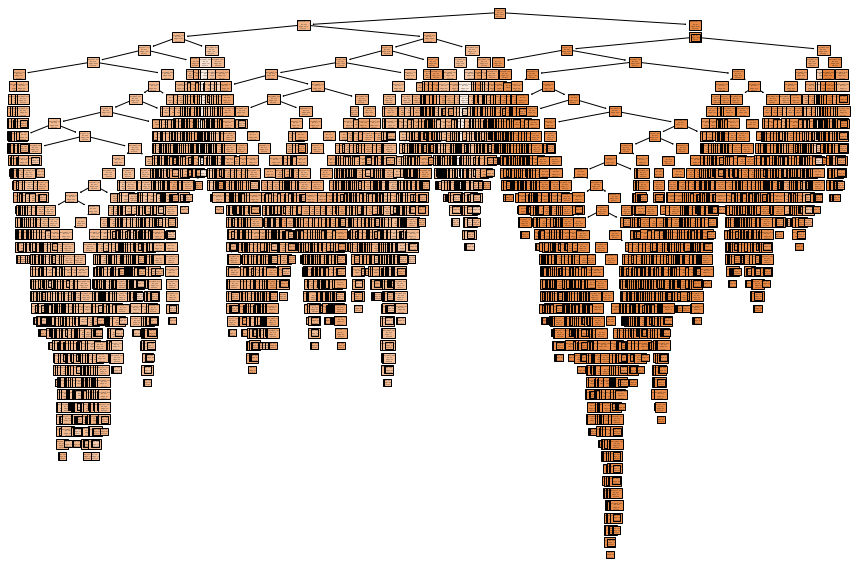

In [10]:
reg_tree = DecisionTreeRegressor(criterion="mse", min_samples_leaf=100, random_state=1)
reg_tree.fit(X_train, y_train)

features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('treegerman1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

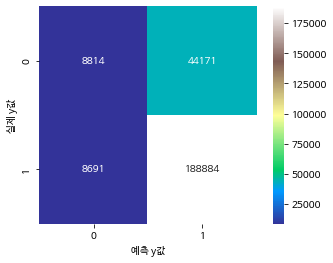

accuracy : 0.78902
f1-score : 0.87724
Macro f1-score : 0.56366
              precision    recall  f1-score   support

           0       0.50      0.17      0.25     52985
           1       0.81      0.96      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.66      0.56      0.56    250560
weighted avg       0.75      0.79      0.74    250560

수행 시간: 2.161초


In [11]:
start_time = time.time()
tmp_pred = [] # regression 에서 사후확률 구함, 0.5보다 크거나 같으면 1 작으면 0으로 맵핑
# for i in range(len(reg_tree.predict(X_test))):
#     if reg_tree.predict(X_test)[i] >= 0.5:
#         tmp_pred.append(1)
#     else:
#         tmp_pred.append(0)

tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))

y_test_list = y_test['TAG'].values.tolist()


confusion_dt = confusion_matrix(y_test_list, tmp_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plt.xlabel('예측 y값')
plt.ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test_list, tmp_pred)
f1 = f1_score(y_test_list, tmp_pred)
f1_macro = f1_score(y_test_list, tmp_pred, average='macro')
auc = roc_auc_score(y_test_list, tmp_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test_list, tmp_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

In [18]:
print("Recall : ", 188884/197575)
print("Precision : ",188884/(44171+188884))
print("예측1/실제0 : ",44171/(52985))

Recall :  0.9560116411489308
Precision :  0.8104696316320182
예측1/실제0 :  0.8336510333113145


## Ada Boost

In [12]:
start_time = time.time()
clf = AdaBoostClassifier(n_estimators=150, 
                        random_state=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print('AdaBoost 정확도: {:.5f}'.format(accuracy_score(y_test, pred)))


confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 0.79217
f1-score : 0.88214
Macro f1-score : 0.50187
              precision    recall  f1-score   support

           0       0.57      0.07      0.12     52985
           1       0.80      0.99      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.69      0.53      0.50    250560
weighted avg       0.75      0.79      0.72    250560

수행 시간: 68.990초


In [19]:
print("Recall : ", 194882/197575)
print("Precision : ",194882/(49381+194882))
print("예측1/실제0 : ",49381/(52985))

Recall :  0.98636973301278
Precision :  0.7978367579207657
예측1/실제0 :  0.9319807492686609


## Gradient Boost

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


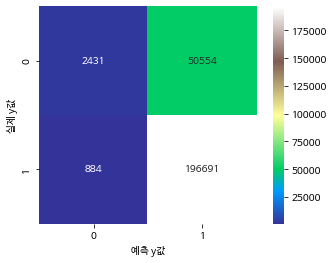

accuracy : 0.79471
f1-score : 0.88436
Macro f1-score : 0.48536
              precision    recall  f1-score   support

           0       0.73      0.05      0.09     52985
           1       0.80      1.00      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.76      0.52      0.49    250560
weighted avg       0.78      0.79      0.72    250560

수행 시간: 70.600초


In [13]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)

confusion_dt = confusion_matrix(y_test, gb_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
f1_macro = f1_score(y_test, gb_pred, average='macro')
auc = roc_auc_score(y_test, gb_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, gb_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

In [21]:
print("Recall : ", 196691/197575)
print("Precision : ",196691/(50554+196691))
print("예측1/실제0 : ",50554/(52985))

Recall :  0.995525749715298
Precision :  0.795530748852353
예측1/실제0 :  0.9541190903085779


## Random Forest
* RF로 feature importance를 살펴본 결과
* 가장 중요도가 낮은 INSP를 제거하고 분석하기로 결정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


랜덤 포레스트 예측 정확도: 0.79468


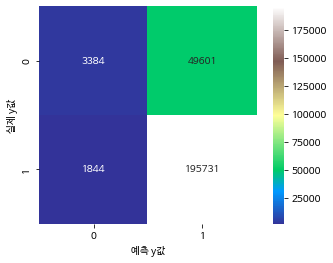

accuracy : 0.79468
f1-score : 0.88385
Macro f1-score : 0.50005
              precision    recall  f1-score   support

           0       0.65      0.06      0.12     52985
           1       0.80      0.99      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.72      0.53      0.50    250560
weighted avg       0.77      0.79      0.72    250560

수행 시간: 150.909초


In [14]:
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=100, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

In [20]:
print("Recall : ", 195731/197575)
print("Precision : ",195731/(49601+195731))
print("예측1/실제0 : ",49601/(52985))

Recall :  0.99066683537897
Precision :  0.7978209120701742
예측1/실제0 :  0.9361328677927715


### feature importance

In [31]:
rfr = pd.Series(rf_clf.feature_importances_, index=X.columns)
rfr.nlargest(10).plot(kind='barh')
plt.title("Feature Impotance", fontsize=18)

Text(0.5, 1.0, 'Feature Impotance')

## INSP 제거
* ~~한 방법이 가장 좋음
* INSP를 제거하면 성능이 더 올라감
* 따라서 INSP는 제거!

In [11]:
drop_insp = df2.drop("INSP", axis=1)
drop_insp

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  TAG
0             489         116          631    1
1             433          78          609    1
2             464         154          608    1
3             379         212          606    1
4             798        1736          604    1
...           ...         ...          ...  ...
835195        755        1743          318    1
835196        385         206          317    1
835197        465         148          316    1
835198        467           0          314    1
835199        453         125          312    1

[835200 rows x 4 columns]

In [58]:
X = drop_insp.drop('TAG',axis=1)
Y = drop_insp[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [59]:
reg_tree = DecisionTreeRegressor(criterion='mse', min_samples_leaf=2500, random_state=1)
reg_tree.fit(X_train, y_train)

features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('treegerman1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


In [60]:
start_time = time.time()
tmp_pred = [] # regression 에서 사후확률 구함, 0.5보다 크거나 같으면 1 작으면 0으로 맵핑
# for i in range(len(reg_tree.predict(X_test))):
#     if reg_tree.predict(X_test)[i] >= 0.5:
#         tmp_pred.append(1)
#     else:
#         tmp_pred.append(0)

tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))
        
y_test_list = y_test['TAG'].values.tolist()


confusion_dt = confusion_matrix(y_test_list, tmp_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test_list, tmp_pred)
f1 = f1_score(y_test_list, tmp_pred)
f1_macro = f1_score(y_test_list, tmp_pred, average='macro')
auc = roc_auc_score(y_test_list, tmp_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test_list, tmp_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_

accuracy : 0.79413
f1-score : 0.88369
Macro f1-score : 0.49421
              precision    recall  f1-score   support

           0       0.65      0.06      0.10     52985
           1       0.80      0.99      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.72      0.52      0.49    250560
weighted avg       0.77      0.79      0.72    250560

수행 시간: 1.285초


In [61]:
start_time = time.time()
clf = AdaBoostClassifier(n_estimators=30, 
                        random_state=1, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print('AdaBoost 정확도: {:.5f}'.format(accuracy_score(y_test, pred)))


confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backe

accuracy : 0.78853
f1-score : 0.88177
Macro f1-score : 0.44088
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     52985
           1       0.79      1.00      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.39      0.50      0.44    250560
weighted avg       0.62      0.79      0.70    250560

수행 시간: 11.292초


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/

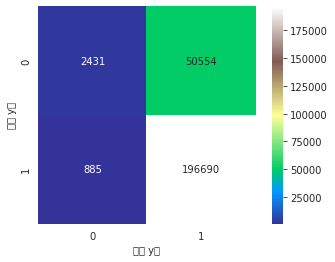

accuracy : 0.79470
f1-score : 0.88436
Macro f1-score : 0.48536
              precision    recall  f1-score   support

           0       0.73      0.05      0.09     52985
           1       0.80      1.00      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.76      0.52      0.49    250560
weighted avg       0.78      0.79      0.72    250560

수행 시간: 56.313초


In [62]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)

confusion_dt = confusion_matrix(y_test, gb_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
f1_macro = f1_score(y_test, gb_pred, average='macro')
auc = roc_auc_score(y_test, gb_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, gb_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


랜덤 포레스트 예측 정확도: 0.79284


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_

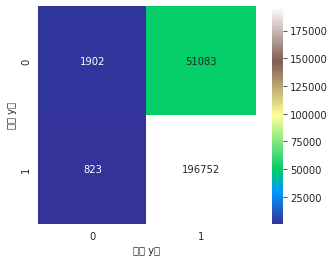

accuracy : 0.79284
f1-score : 0.88346
Macro f1-score : 0.47587
              precision    recall  f1-score   support

           0       0.70      0.04      0.07     52985
           1       0.79      1.00      0.88    197575

    accuracy                           0.79    250560
   macro avg       0.75      0.52      0.48    250560
weighted avg       0.77      0.79      0.71    250560

수행 시간: 42.124초


In [63]:
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, 
                                criterion='entropy', min_samples_leaf=2500, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

## WEIGHT <= 10000
* INSP 제거 후 데이터 이용
* weight를 보면 최소값과 최대값의 차이가 굉장히 크며, 중앙값과 평균의 차이가 큰 것을 알수있음
* 따라서 10000이상의 데이터는 이상치로 판단해 제거 후 분석해보기


In [12]:
test1 = drop_insp[drop_insp["MELT_WEIGHT"]<=10000]

In [65]:
X = test1.drop('TAG',axis=1)
Y = test1[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


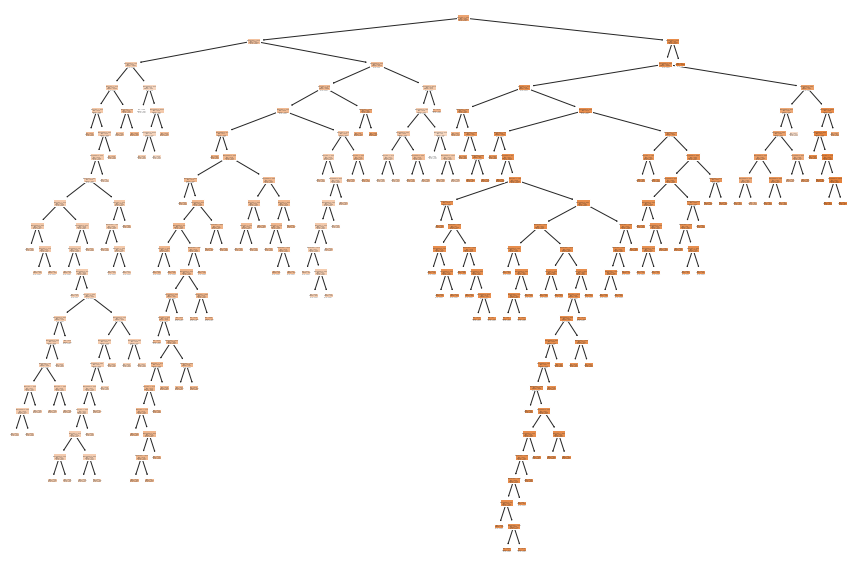

In [66]:
reg_tree = DecisionTreeRegressor(criterion='mse', min_samples_leaf=2500, random_state=1)
reg_tree.fit(X_train, y_train)

features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('treegerman1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_

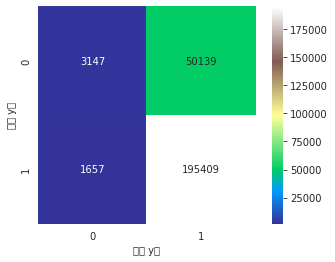

accuracy : 0.79311
f1-score : 0.88298
Macro f1-score : 0.49566
              precision    recall  f1-score   support

           0       0.66      0.06      0.11     53286
           1       0.80      0.99      0.88    197066

    accuracy                           0.79    250352
   macro avg       0.73      0.53      0.50    250352
weighted avg       0.77      0.79      0.72    250352

수행 시간: 1.303초


In [67]:
start_time = time.time()
tmp_pred = [] # regression 에서 사후확률 구함, 0.5보다 크거나 같으면 1 작으면 0으로 맵핑
# for i in range(len(reg_tree.predict(X_test))):
#     if reg_tree.predict(X_test)[i] >= 0.5:
#         tmp_pred.append(1)
#     else:
#         tmp_pred.append(0)

tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))
        
y_test_list = y_test['TAG'].values.tolist()


confusion_dt = confusion_matrix(y_test_list, tmp_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test_list, tmp_pred)
f1 = f1_score(y_test_list, tmp_pred)
f1_macro = f1_score(y_test_list, tmp_pred, average='macro')
auc = roc_auc_score(y_test_list, tmp_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test_list, tmp_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

### Adaboost

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backe

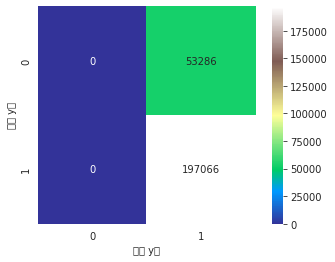

accuracy : 0.78716
f1-score : 0.88090
Macro f1-score : 0.44045
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     53286
           1       0.79      1.00      0.88    197066

    accuracy                           0.79    250352
   macro avg       0.39      0.50      0.44    250352
weighted avg       0.62      0.79      0.69    250352

수행 시간: 10.988초


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
start_time = time.time()
clf = AdaBoostClassifier(n_estimators=30, 
                        random_state=1, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print('AdaBoost 정확도: {:.5f}'.format(accuracy_score(y_test, pred)))


confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

### Gradient Boost

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/

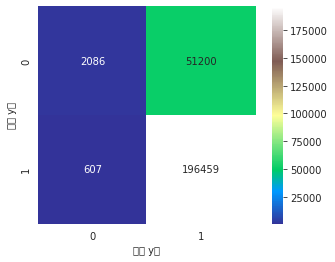

accuracy : 0.79306
f1-score : 0.88351
Macro f1-score : 0.47902
              precision    recall  f1-score   support

           0       0.77      0.04      0.07     53286
           1       0.79      1.00      0.88    197066

    accuracy                           0.79    250352
   macro avg       0.78      0.52      0.48    250352
weighted avg       0.79      0.79      0.71    250352

수행 시간: 55.254초


In [69]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)

confusion_dt = confusion_matrix(y_test, gb_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
f1_macro = f1_score(y_test, gb_pred, average='macro')
auc = roc_auc_score(y_test, gb_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, gb_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

### Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


랜덤 포레스트 예측 정확도: 0.79173


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_

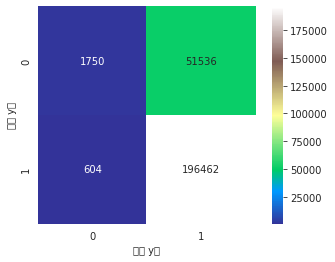

accuracy : 0.79173
f1-score : 0.88285
Macro f1-score : 0.47288
              precision    recall  f1-score   support

           0       0.74      0.03      0.06     53286
           1       0.79      1.00      0.88    197066

    accuracy                           0.79    250352
   macro avg       0.77      0.51      0.47    250352
weighted avg       0.78      0.79      0.71    250352

수행 시간: 36.262초


In [70]:
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=100, oob_score=True, 
                                criterion='entropy', min_samples_leaf=2500, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

## SPEED = 0
* speed의 분포를 보면 0인 데이터가 굉장히 많음
* speed=0인 데이터를 제거하고 분석해보기

In [13]:
test2 = test1[test1["MOTORSPEED"]!=0]

In [25]:
X = test2.drop('TAG',axis=1)
Y = test2[['TAG']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [14]:
test2

MELT_TEMP  MOTORSPEED  MELT_WEIGHT  TAG
0             489         116          631    1
1             433          78          609    1
2             464         154          608    1
3             379         212          606    1
4             798        1736          604    1
...           ...         ...          ...  ...
835194        749        1740          319    1
835195        755        1743          318    1
835196        385         206          317    1
835197        465         148          316    1
835199        453         125          312    1

[803729 rows x 4 columns]

### reg tree

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


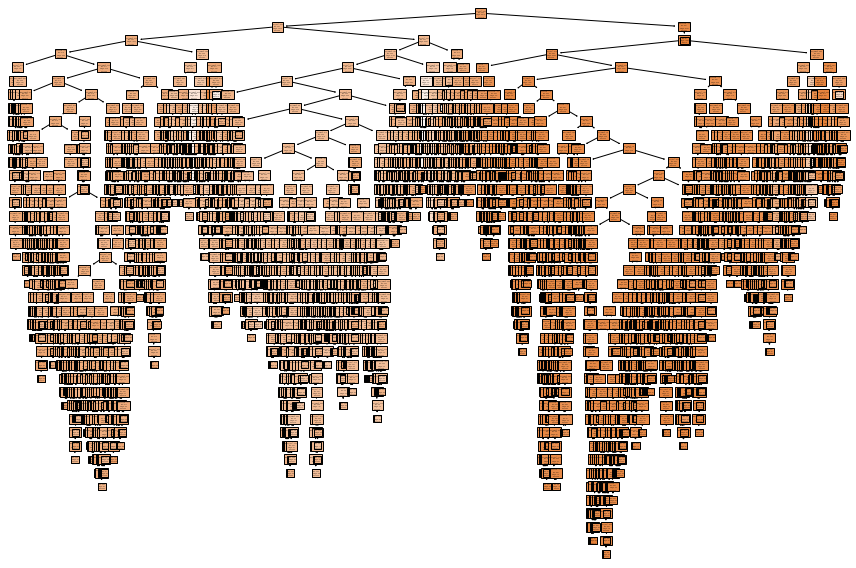

In [28]:
reg_tree = DecisionTreeRegressor(criterion='mse', min_samples_leaf=100, random_state=1)
reg_tree.fit(X_train, y_train)

features = X.columns.tolist()
plt.figure(figsize=(12,8))
tree.plot_tree(reg_tree, feature_names=features, filled=True)
# plt.savefig('treegerman1.png', dpi=500, transparent=True, bbox_inches="tight")
plt.tight_layout()
plt.show()

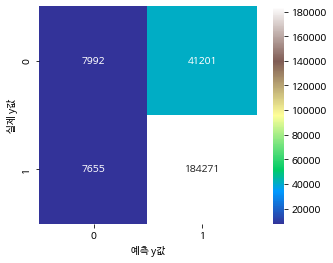

accuracy : 0.79738
f1-score : 0.88295
Macro f1-score : 0.56473
              precision    recall  f1-score   support

           0       0.51      0.16      0.25     49193
           1       0.82      0.96      0.88    191926

    accuracy                           0.80    241119
   macro avg       0.66      0.56      0.56    241119
weighted avg       0.75      0.80      0.75    241119

수행 시간: 2.038초


In [29]:
start_time = time.time()
tmp_pred = [] # regression 에서 사후확률 구함, 0.5보다 크거나 같으면 1 작으면 0으로 맵핑
# for i in range(len(reg_tree.predict(X_test))):
#     if reg_tree.predict(X_test)[i] >= 0.5:
#         tmp_pred.append(1)
#     else:
#         tmp_pred.append(0)

tmp_pred = reg_tree.predict(X_test).tolist()
tmp_pred = list(map(lambda x: 1 if x>=0.5 else 0, tmp_pred))
        
y_test_list = y_test['TAG'].values.tolist()


confusion_dt = confusion_matrix(y_test_list, tmp_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test_list, tmp_pred)
f1 = f1_score(y_test_list, tmp_pred)
f1_macro = f1_score(y_test_list, tmp_pred, average='macro')
auc = roc_auc_score(y_test_list, tmp_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test_list, tmp_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

In [33]:
print("Recall : ", 184271/191926)
print("Precision : ",184271/(41201+184271))
print("예측1/실제0 : ",41201/(49193))

Recall :  0.9601148359263466
Precision :  0.817267776043145
예측1/실제0 :  0.8375378610777956


### Ada

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


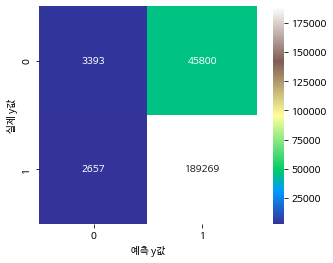

accuracy : 0.79903
f1-score : 0.88652
Macro f1-score : 0.50468
              precision    recall  f1-score   support

           0       0.56      0.07      0.12     49193
           1       0.81      0.99      0.89    191926

    accuracy                           0.80    241119
   macro avg       0.68      0.53      0.50    241119
weighted avg       0.76      0.80      0.73    241119

수행 시간: 67.335초


In [30]:
start_time = time.time()
clf = AdaBoostClassifier(n_estimators=150, 
                        random_state=1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print('AdaBoost 정확도: {:.5f}'.format(accuracy_score(y_test, pred)))


confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

In [34]:
print("Recall : ", 189269/191926)
print("Precision : ",189269/(45800+189269))
print("예측1/실제0 : ",45800/(49193))

Recall :  0.9861561226722799
Precision :  0.8051635902649861
예측1/실제0 :  0.9310267721017218


### GB

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


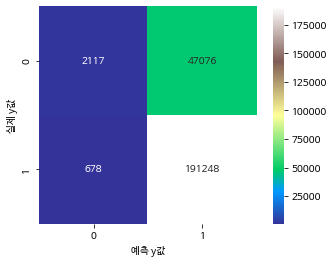

accuracy : 0.80195
f1-score : 0.88901
Macro f1-score : 0.48523
              precision    recall  f1-score   support

           0       0.76      0.04      0.08     49193
           1       0.80      1.00      0.89    191926

    accuracy                           0.80    241119
   macro avg       0.78      0.52      0.49    241119
weighted avg       0.79      0.80      0.72    241119

수행 시간: 62.416초


In [31]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)

confusion_dt = confusion_matrix(y_test, gb_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
f1_macro = f1_score(y_test, gb_pred, average='macro')
auc = roc_auc_score(y_test, gb_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, gb_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

In [35]:
print("Recall : ", 191248/191926)
print("Precision : ",191248/(47076+191248))
print("예측1/실제0 : ",47076/(49193))

Recall :  0.9964673884726405
Precision :  0.8024705862607207
예측1/실제0 :  0.9569654219096213


### RF

In [32]:
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=150, oob_score=True, 
                                criterion='entropy', min_samples_leaf=100, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


랜덤 포레스트 예측 정확도: 0.80152


accuracy : 0.80152
f1-score : 0.88841
Macro f1-score : 0.49591
              precision    recall  f1-score   support

           0       0.66      0.06      0.10     49193
           1       0.80      0.99      0.89    191926

    accuracy                           0.80    241119
   macro avg       0.73      0.52      0.50    241119
weighted avg       0.77      0.80      0.73    241119

수행 시간: 121.055초


In [36]:
print("Recall : ", 190501/191926)
print("Precision : ",190501/(46433+190501))
print("예측1/실제0 : ",46433/(49193))

Recall :  0.9925752633827621
Precision :  0.804025593625229
예측1/실제0 :  0.9438944565283679


# Grid Search
* INSP 제거
* WEIGHT <= 10000
* SPEED = 0 인 데이터 제거

## Ada

In [13]:
start_time = time.time()
params = {
        "n_estimators": range(50, 100, 25),
        "learning_rate": [0.0001, 0.001, 0.01, 0.1]}

ab_clf = AdaBoostClassifier(random_state=1)
grid_cv = GridSearchCV(ab_clf, param_grid=params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.5f}'.format(grid_cv.best_score_))
print('AdaB 수행 시간: {:.1f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'n_estimators': 75}
최고 예측 정확도: 0.79408
AdaB 수행 시간: 335.3초


In [14]:
start_time = time.time()
clf = AdaBoostClassifier(n_estimators=75, 
                        random_state=1, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
# print('AdaBoost 정확도: {:.5f}'.format(accuracy_score(y_test, pred)))


confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backe

accuracy : 0.79721
f1-score : 0.88664
Macro f1-score : 0.46291
              precision    recall  f1-score   support

           0       0.59      0.02      0.04     49193
           1       0.80      1.00      0.89    191926

    accuracy                           0.80    241119
   macro avg       0.69      0.51      0.46    241119
weighted avg       0.76      0.80      0.71    241119

수행 시간: 27.283초


## GB

In [16]:
start_time = time.time()
params = {
        "n_estimators": [100, 200, 300],
        "max_depth": [1, 2, 4],
        "learning_rate": [0.0001, 0.001, 0.01, 0.1],
        "subsample": [0.7, 0.9],
        "max_features": [1, 3, 5, 7, 9]}

gb_clf = GradientBoostingClassifier(random_state=1)
grid_cv = GridSearchCV(gb_clf, param_grid=params, n_jobs=-1, cv=3, scoring="roc_auc")
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.5f}'.format(grid_cv.best_score_))
print('GBM 수행 시간: {:.1f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
648 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 596, in fit
    monitor,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 672, in _fit_stages
    X_csr,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 246, in _fit_stage
    t

최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 3, 'n_estimators': 300, 'subsample': 0.9}
최고 예측 정확도: 0.80693
GBM 수행 시간: 15565.0초


In [18]:
# GBM 수행시간 측정을 위함. 시작시간 설정
start_time = time.time()

# 예시 데이터셋 불러오기
gb_clf = GradientBoostingClassifier(random_state=1, max_depth=4, max_features=3, n_estimators=300, subsample=0.9, learning_rate=0.1)
gb_clf.fit(X_train, y_train.values)
gb_pred = gb_clf.predict(X_test)
# gb_accuracy = accuracy_score(y_test, gb_pred)

confusion_dt = confusion_matrix(y_test, gb_pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
f1_macro = f1_score(y_test, gb_pred, average='macro')
auc = roc_auc_score(y_test, gb_pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, gb_pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/

accuracy : 0.80313
f1-score : 0.88911
Macro f1-score : 0.50643
              precision    recall  f1-score   support

           0       0.67      0.07      0.12     49193
           1       0.81      0.99      0.89    191926

    accuracy                           0.80    241119
   macro avg       0.74      0.53      0.51    241119
weighted avg       0.78      0.80      0.73    241119

수행 시간: 227.462초


## RF

In [19]:
start_time = time.time()
params = {'n_estimators' : [100, 200, 300, 400],
         'min_samples_leaf': [2000, 2500, 5000, 10000]}

rf_clf = RandomForestClassifier(random_state=1, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
print('RF 수행 시간: {:.1f}초'.format(time.time() - start_time))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


최적 하이퍼 파라미터:  {'min_samples_leaf': 2000, 'n_estimators': 400}
최고 예측 정확도: 0.8001
RF 수행 시간: 3173.7초


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


랜덤 포레스트 예측 정확도: 0.80029


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52769 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_

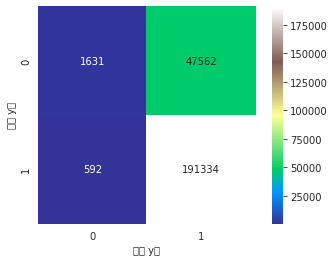

accuracy : 0.80029
f1-score : 0.88823
Macro f1-score : 0.47584
              precision    recall  f1-score   support

           0       0.73      0.03      0.06     49193
           1       0.80      1.00      0.89    191926

    accuracy                           0.80    241119
   macro avg       0.77      0.52      0.48    241119
weighted avg       0.79      0.80      0.72    241119

수행 시간: 232.161초


In [21]:
start_time = time.time()
rf_clf = RandomForestClassifier(n_estimators=400, oob_score=True, 
                                criterion='entropy', min_samples_leaf=2000, random_state=1, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 예측 정확도: {:.5f}'.format(accuracy))

confusion_dt = confusion_matrix(y_test, pred)

plot = sns.heatmap(confusion_dt ,square=True, annot=True, fmt='d', cmap='terrain')
class_lables=['0','1','2','3']
# plt.title("80% 사후확률, min_sample={}".format(j), size = 12)
plot.set_xlabel('예측 y값')
plot.set_ylabel('실제 y값')
# plt.savefig('80% 사후확률_min_{}_수정.png'.format(j), dpi=300, transparent=True, bbox_inches="tight")
plt.show()

acc = accuracy_score(y_test, pred)
f1 = f1_score(y_test, pred)
f1_macro = f1_score(y_test, pred, average='macro')
auc = roc_auc_score(y_test, pred)
print('accuracy : {:.5f}'.format(acc))
print('f1-score : {:.5f}'.format(f1))
print('Macro f1-score : {:.5f}'.format(f1_macro))
print("==============================================")
print(classification_report(y_test, pred))
print("==============================================")

# print(acc)
print('수행 시간: {:.3f}초'.format(time.time() - start_time))